<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling
คือ การลดขนาดของตัวที่มีหลายตัวแปร/หลาย dimension จากที่มีเยอะก็ลดให้มันเหลือน้อยๆ 




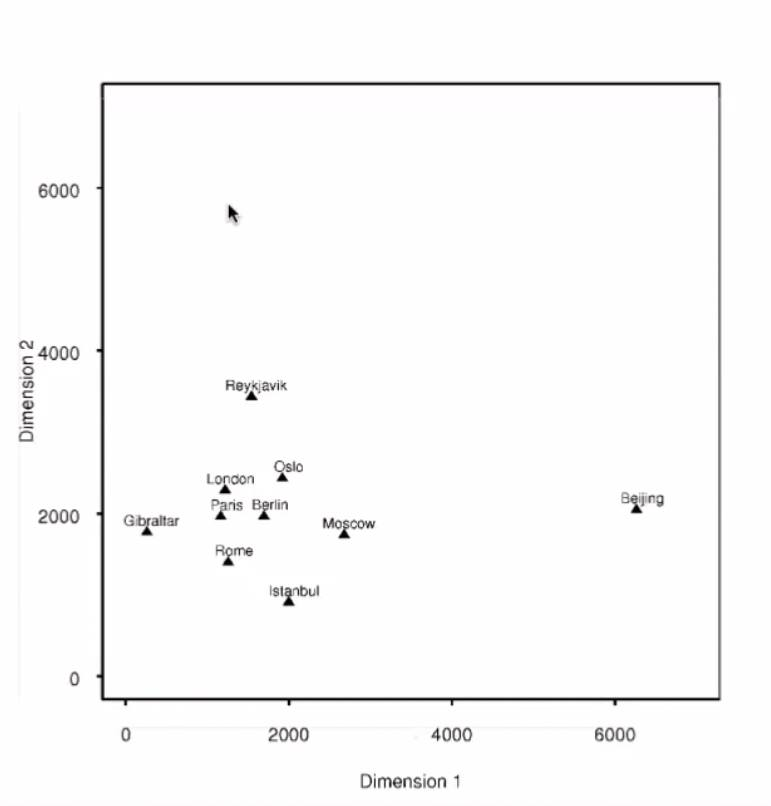

## Example on Iris dataset

In [1]:
import pandas as pd

In [3]:
example_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)

In [4]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [8]:
from matplotlib import pyplot as plt

####อันข้างล่างนี้คือ PCA มันก็จะมีการกระจายข้อมูลแบบนี้

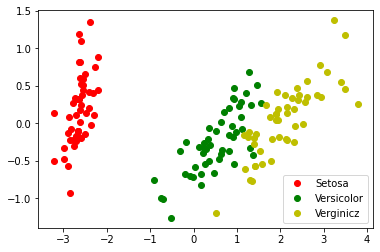

In [9]:
plt.plot(new_pca[:50,0], new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0], new_pca[100:,1],'oy',label='Verginicz')
plt.legend()        

#MDS (Multidimensional Scaling)

##Distance   
ก็คือระยะห่างระหว่างจุด

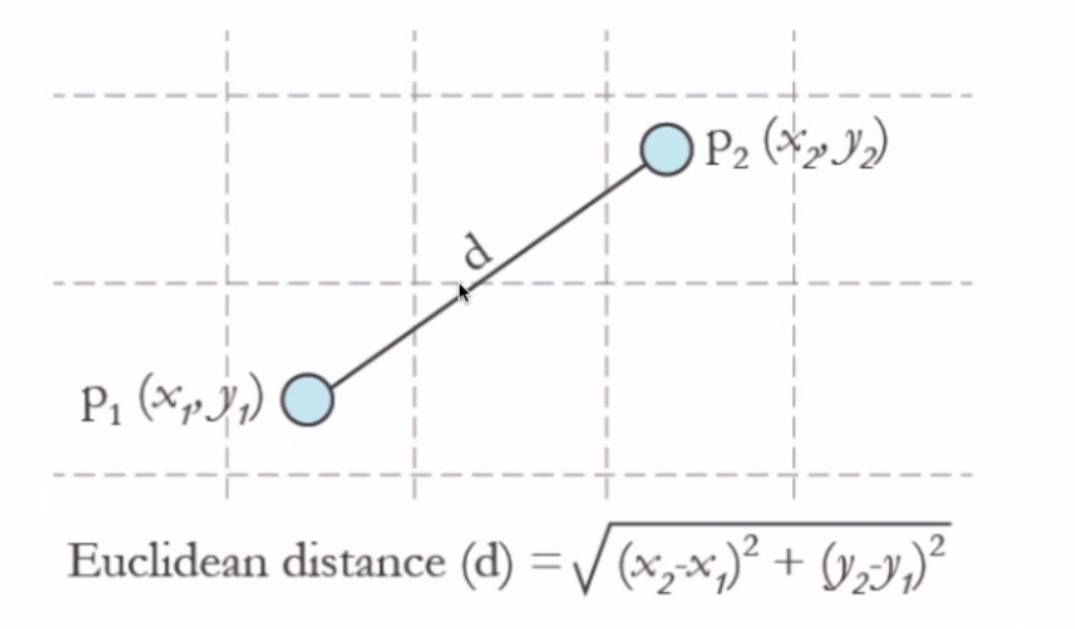

ู^^^^^^  สูตรคือ เอา dimension ตัวที่สองลบตัวแรกละทั้งหมดกำลังสองละก็ถอดรูท  

In [10]:
X1 = example_df.iloc[0,:-1].to_numpy()   #.tonumpy เพื่อให้มันเป็นตัวเลขจะได้เอาไปทำอย่างอื่นได้
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [11]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [13]:
import numpy as np  #numpy=แพ๊คเกจรวมที่จัดการdata ที่เป็นarray ละก็ตัวเลข

In [14]:
dist = np.linalg.norm(X1-X2)   
dist

0.5385164807134502

In [ ]:
(0.04 + 0.25)**(0.5)

0.5385164807134504

##Distance Matrix 

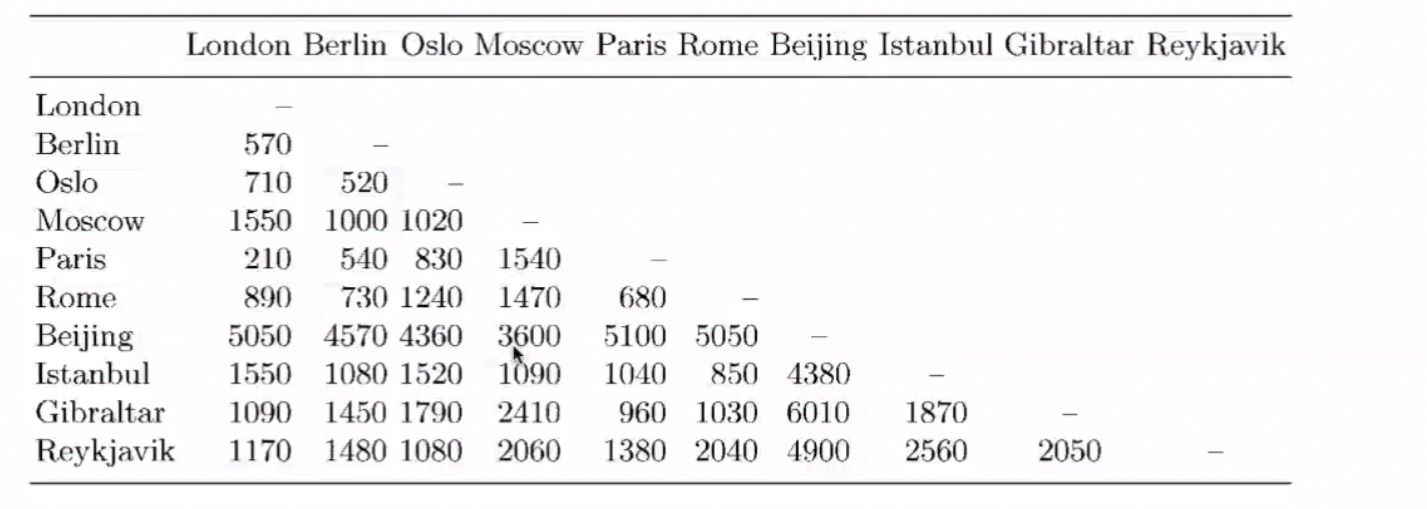

In [15]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

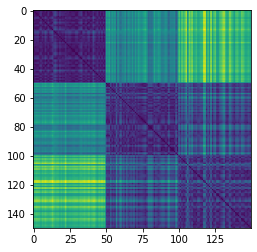

In [16]:
plt.imshow(dis_matrix)     #เอาแต่ละจุดในเมทริกซ์มาplot เป็นสี ยิ่งค่ามากสียิ่งสว่างยิ่งค่าน้อยสียิ่งเข้ม
#1-50 ถ้าเทียบกันเองสีมันเข้ม แปลว่า ระยะห่างค่าน้อยที่ค่าน้อยเพราะ 50 พันธุ์แรกพันธุ์เดียวกัน
#สีเหลี่ยมสามก้อนแรก เทียบได้ว่าพันธุ์ที่ 1เทียบกับ 2 มันจะห่างปานกลาง แต่ถ้าพันธุ์ที่ 1เทียบ 3 จะมีความต่างมาก

##  ทำ MDS

In [18]:
from sklearn.manifold import MDS

In [19]:
mds = MDS(n_components=2)

In [20]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

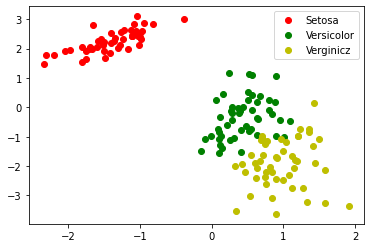

In [22]:
plt.plot(new_mds[:50,0], new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0], new_mds[100:,1],'oy',label='Verginicz')
plt.legend()

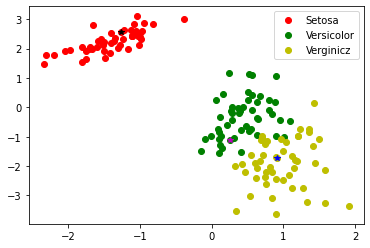

In [24]:
plt.plot(new_mds[:50,0], new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0], new_mds[100:,1],'oy',label='Verginicz')
plt.plot(new_mds[6,0], new_mds[6,1],'*k')
plt.plot(new_mds[56,0], new_mds[56,1],'*m')
plt.plot(new_mds[116,0], new_mds[116,1],'*b')
plt.legend()

### การใช้ Pre-computed Distance Matrix


In [31]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')  

In [32]:
new_mds2 = mds2.fit_transform(dis_matrix)

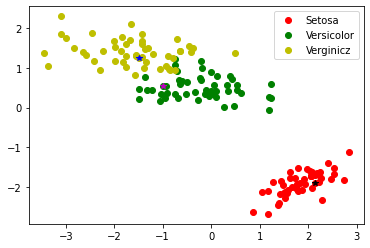

In [33]:
plt.plot(new_mds2[:50,0], new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0], new_mds2[100:,1],'oy',label='Verginicz')
plt.plot(new_mds2[6,0], new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0], new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0], new_mds2[116,1],'*b')
plt.legend()


In [34]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock')  #'cityblock'

MDS ลดdimension โดยสนใจแค่ระยะห่างระหว่างจุดที่ใกล้กันก็ใกล้เหมือนเดิม อันนี้มันย้ายจุดเลย 
PCA รักษา shape ของจุดแค่เปลี่ยนมุมมองเฉยๆ

##Example2

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [36]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

#####เป็นการเรียกใช้ฟังก์ชันและแสดงภาพข้อมูลที่เป็นผลลัพธ์

In [37]:
X = make_hello(1000)  ##1000ก็คือจำนวนจุด

In [38]:
X.shape  #2 ก็คือ x กับ y

(1000, 2)

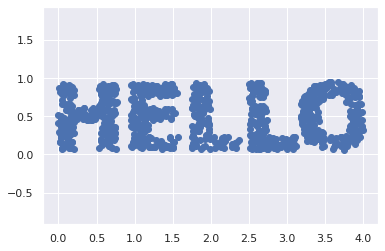

In [39]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');   #ทำให้สเกลของแต่ละแกนมันเท่ากัน

In [52]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [51]:
colorize['c'].shape

(1000,)

In [53]:
colorize['cmap']

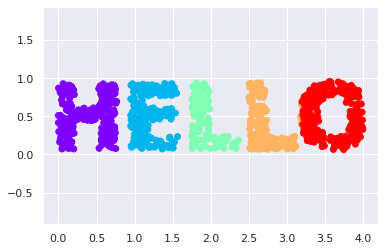

In [50]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [54]:
def rotate(X, angle):  
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

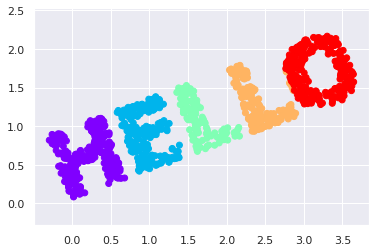

In [55]:
X2 = rotate(X, 20)    #หมุนจุดไป 20 องศา  
plt.scatter(X2[:, 0], X2[:, 1], **colorize)  
plt.axis('equal');

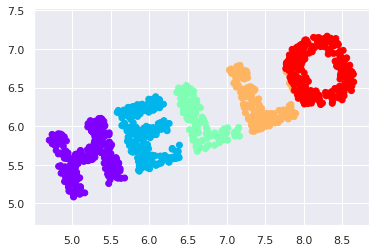

In [56]:
X2 = rotate(X, 20) + 5   #เลื่อนไปแกน Y,X ทุกๆค่าบวก 5 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

#MDS

In [57]:
from sklearn.metrics import pairwise_distances    
D = pairwise_distances(X)     #ดูระยะห่างของจุดแต่ละจุดว่ามันห่างกันเท่าไหร่
D.shape

(1000, 1000)

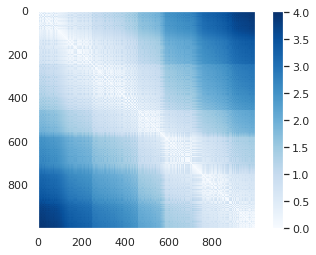

In [58]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();   #บอกสเกลว่าสีแต่ละสีบอกอะไร

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same

In [59]:
D2 = pairwise_distances(X2)

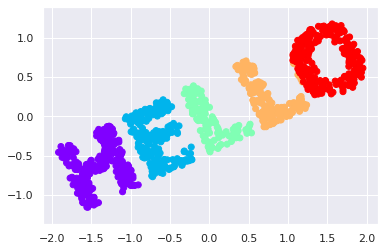

In [60]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)  #random state เหมือนการฟิคไม่สุ่ม
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

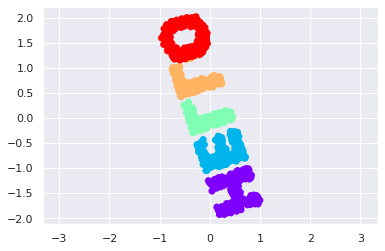

In [61]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

##ทดลองทำ PCA กับข้อมูล X แล้ว plotgraph และดูผลว่าการกระจายข้อมูลมันเปลี่ยนไปหรือไม่อย่างไร

In [62]:
import numpy as np

In [63]:
X

array([[4.65390215e-05, 4.16565828e-01],
       [5.38772018e-04, 5.11129139e-01],
       [2.61356305e-03, 8.70669034e-01],
       ...,
       [3.99099756e+00, 4.51739476e-01],
       [3.99173644e+00, 3.50711815e-01],
       [3.99557045e+00, 3.26639249e-01]])

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
X_pca = pca.fit_transform(X)
X_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

In [67]:
from matplotlib import pyplot as plt

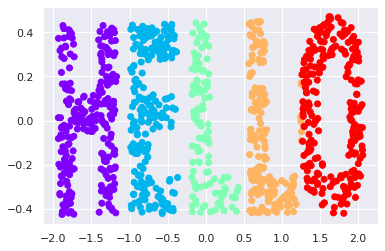

In [68]:
plt.scatter(X_pca[:,0],X_pca[:,1],**colorize)   #ได้เหมือนเดิม

No handles with labels found to put in legend.


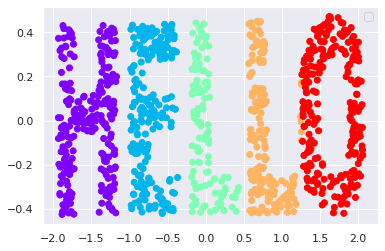

In [69]:
plt.scatter(X_pca[:,0],X_pca[:,1],**colorize)
plt.legend()

No handles with labels found to put in legend.


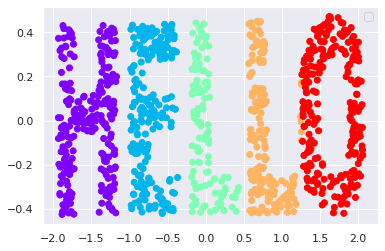

In [70]:
model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:,0],out[:,1], **colorize)
plt.legend()

No handles with labels found to put in legend.


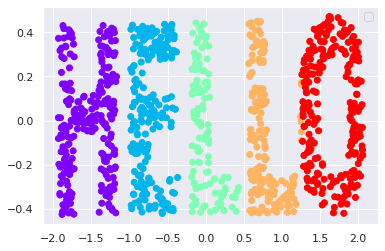

In [71]:
model = PCA(n_components=2)
out3 = model.fit_transform(X2)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.legend()

* zorder in plt.imshow
* np.allclose()
* random state